# 주식:채권 혼합 전략  p141
- 투자기간 : 2001년 1월 ~2017년 6월
- 투자자산 : 코스피200지수, 10년만기국고채지수
- 매수원칙 : 1:1로 매수
- 매도원칙 : 매월말 리밸런싱

그림 2-11 (8.3%/-23.8%)

In [1]:
from settings import *

In [2]:
tickers = ['kodex200', 'kbond10y', 'kbond20y']
read_df = get_data()
read_df = read_df[tickers]
read_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5433 entries, 2000-01-04 to 2021-12-30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kodex200  5433 non-null   float64
 1   kbond10y  5433 non-null   float64
 2   kbond20y  5433 non-null   float64
dtypes: float64(3)
memory usage: 169.8 KB


In [3]:
data = read_df['2001':].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5192 entries, 2001-01-02 to 2021-12-30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kodex200  5192 non-null   float64
 1   kbond10y  5192 non-null   float64
 2   kbond20y  5192 non-null   float64
dtypes: float64(3)
memory usage: 162.2 KB


In [4]:
주식채권혼합전략 = bt.Strategy('1:1분산리밸런싱',
    [
        bt.algos.RunMonthly(run_on_end_of_period=True), #매월말
        bt.algos.PrintDate(),
        bt.algos.SelectAll(),
        bt.algos.WeighEqually(),
        bt.algos.Rebalance()
    ]
)

In [5]:
bt_kodex200 = long_only_ew(data, ['kodex200'], 'kodex200', initial_capital=100000000)
bt_kbond10y = long_only_ew(data, ['kbond10y'], 'kbond10y', initial_capital=100000000)

In [6]:
bt_test10 = bt.Backtest(주식채권혼합전략, data[['kodex200', 'kbond10y']], 
                name='1:1(10년국채)', initial_capital=100000000)

In [7]:
r10 = bt.run(bt_kodex200, bt_kbond10y, bt_test10)

2001-01-02 00:00:00
2001-01-02 00:00:00
2001-01-02 00:00:00
2001-01-31 00:00:00
2001-02-28 00:00:00
2001-03-30 00:00:00
2001-04-30 00:00:00
2001-05-31 00:00:00
2001-06-29 00:00:00
2001-07-31 00:00:00
2001-08-31 00:00:00
2001-09-28 00:00:00
2001-10-31 00:00:00
2001-11-30 00:00:00
2001-12-28 00:00:00
2002-01-31 00:00:00
2002-02-28 00:00:00
2002-03-29 00:00:00
2002-04-30 00:00:00
2002-05-31 00:00:00
2002-06-28 00:00:00
2002-07-31 00:00:00
2002-08-30 00:00:00
2002-09-30 00:00:00
2002-10-31 00:00:00
2002-11-29 00:00:00
2002-12-30 00:00:00
2003-01-30 00:00:00
2003-02-28 00:00:00
2003-03-31 00:00:00
2003-04-30 00:00:00
2003-05-30 00:00:00
2003-06-30 00:00:00
2003-07-31 00:00:00
2003-08-29 00:00:00
2003-09-30 00:00:00
2003-10-31 00:00:00
2003-11-28 00:00:00
2003-12-30 00:00:00
2004-01-30 00:00:00
2004-02-27 00:00:00
2004-03-31 00:00:00
2004-04-30 00:00:00
2004-05-31 00:00:00
2004-06-30 00:00:00
2004-07-30 00:00:00
2004-08-31 00:00:00
2004-09-30 00:00:00
2004-10-29 00:00:00
2004-11-30 00:00:00


In [8]:
r10.backtests['1:1(10년국채)'].stats.display()

Stats for price from 2001-01-01 00:00:00 - 2021-12-30 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
471.93%             0.79  8.66%   -28.16%

Annualized Returns:
mtd    3m      6m      ytd    1y     3y     5y     10y    incep.
-----  ------  ------  -----  -----  -----  -----  -----  --------
3.17%  -0.17%  -4.85%  0.33%  0.33%  9.37%  6.56%  5.45%  8.66%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.79     0.82       0.86
mean    9.13%    8.30%      8.44%
vol     11.49%   10.07%     9.81%
skew    -0.13    0.02       -0.43
kurt    6.22     0.50       -0.08
best    6.18%    10.35%     23.04%
worst   -5.70%   -8.19%     -14.29%

Drawdowns:
max      avg       # days
-------  ------  --------
-28.16%  -1.80%     32.22

Misc:
---------------  ------
avg. up month    2.48%
avg. down month  -2.01%
up year %        85.00%
12m up %         8

In [9]:
r10.display()

Stat                 kodex200    kbond10y    1:1(10년국채)
-------------------  ----------  ----------  ---------------
Start                2001-01-01  2001-01-01  2001-01-01
End                  2021-12-30  2021-12-30  2021-12-30
Risk-free rate       0.00%       0.00%       0.00%

Total Return         781.49%     187.67%     471.93%
Daily Sharpe         0.58        0.78        0.79
Daily Sortino        0.93        1.18        1.29
CAGR                 10.92%      5.16%       8.66%
Max Drawdown         -52.67%     -11.98%     -28.16%
Calmar Ratio         0.21        0.43        0.31

MTD                  6.52%       -0.18%      3.17%
3m                   -0.81%      0.24%       -0.17%
6m                   -9.05%      -0.74%      -4.85%
YTD                  2.77%       -2.44%      0.33%
1Y                   2.77%       -2.44%      0.33%
3Y (ann.)            17.32%      0.89%       9.37%
5Y (ann.)            10.82%      1.58%       6.56%
10Y (ann.)           6.81%       3.49%       5.45%
S

In [10]:
r10.prices.resample('M').last().to_drawdown_series().describe()

,kodex200,kbond10y,1:1(10년국채)
count,252.000,252.000,252.000
mean,-0.099,-0.024,-0.025
std,0.092,0.025,0.038
min,-0.455,-0.108,-0.231
25%,-0.145,-0.044,-0.035
50%,-0.084,-0.017,-0.012
75%,-0.023,0.000,0.000
max,0.000,0.000,0.000


<AxesSubplot:title={'center':'monthly Equity Progression'}>

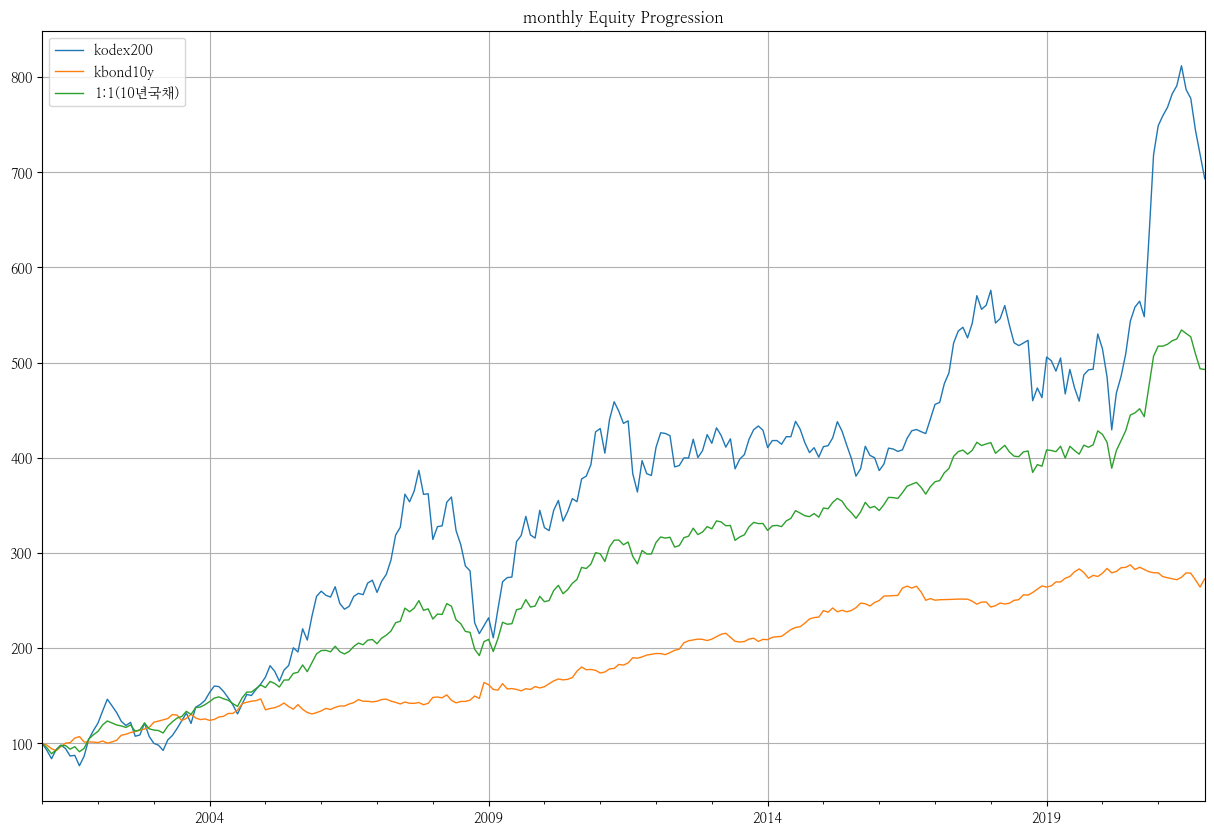

In [11]:
r10.plot(freq='M', figsize=(15,10));

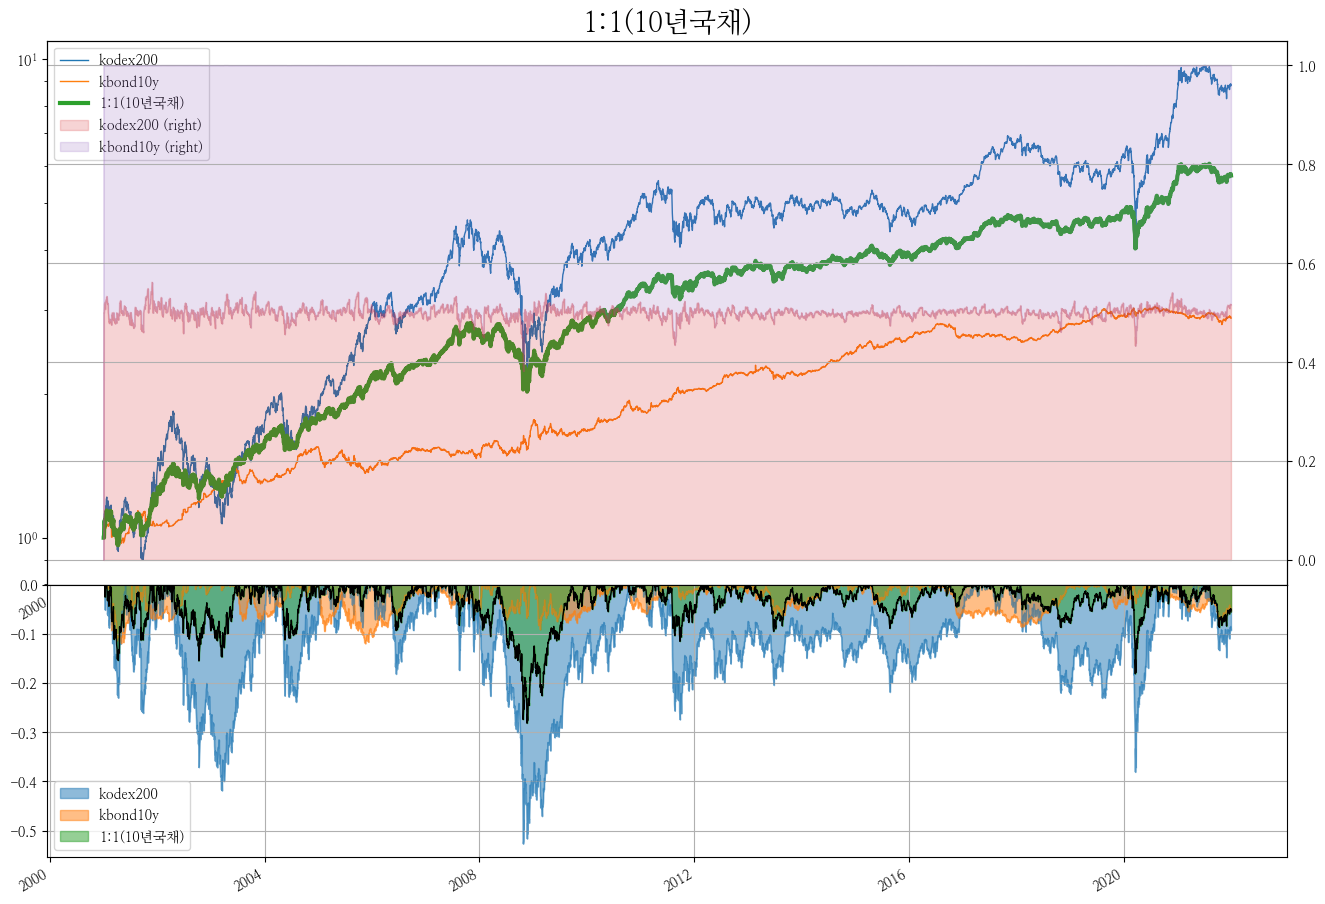

In [12]:
plot_assets(r10, '2001', '2021', '1:1(10년국채)')

In [13]:
bt_ew10 = long_only_ew(data, ['kodex200', 'kbond10y'], '동일비중(10년국채)', initial_capital=100000000)
r10_ew = bt.run(bt_test10, bt_ew10)

2001-01-02 00:00:00


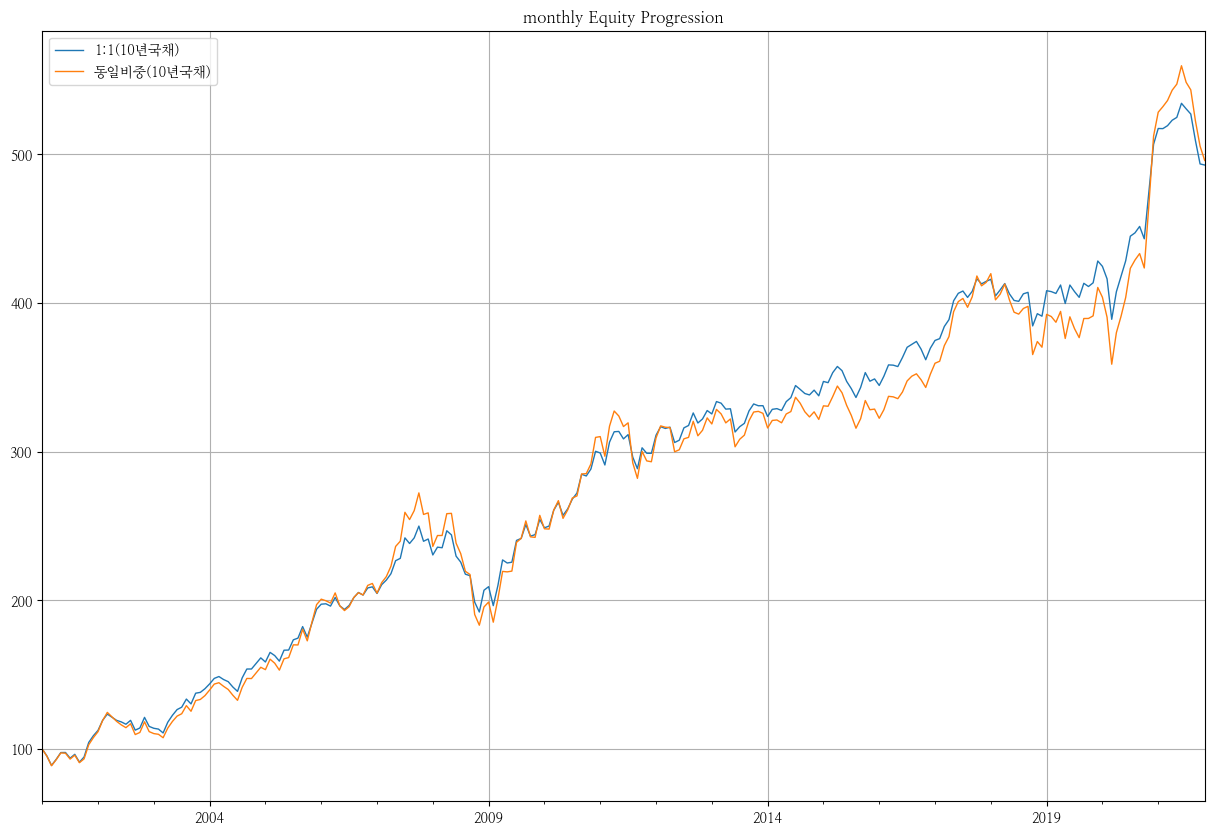

In [14]:
r10_ew.plot(freq='M', figsize=(15,10));

In [15]:
r10_ew.display()

Stat                 1:1(10년국채)    동일비중(10년국채)
-------------------  ---------------  --------------------
Start                2001-01-01       2001-01-01
End                  2021-12-30       2021-12-30
Risk-free rate       0.00%            0.00%

Total Return         471.93%          484.52%
Daily Sharpe         0.79             0.67
Daily Sortino        1.29             1.08
CAGR                 8.66%            8.77%
Max Drawdown         -28.16%          -38.66%
Calmar Ratio         0.31             0.23

MTD                  3.17%            4.79%
3m                   -0.17%           -0.55%
6m                   -4.85%           -7.14%
YTD                  0.33%            1.44%
1Y                   0.33%            1.44%
3Y (ann.)            9.37%            12.28%
5Y (ann.)            6.56%            8.06%
10Y (ann.)           5.45%            5.88%
Since Incep. (ann.)  8.66%            8.77%

Daily Sharpe         0.79             0.67
Daily Sortino        1.29             1.08

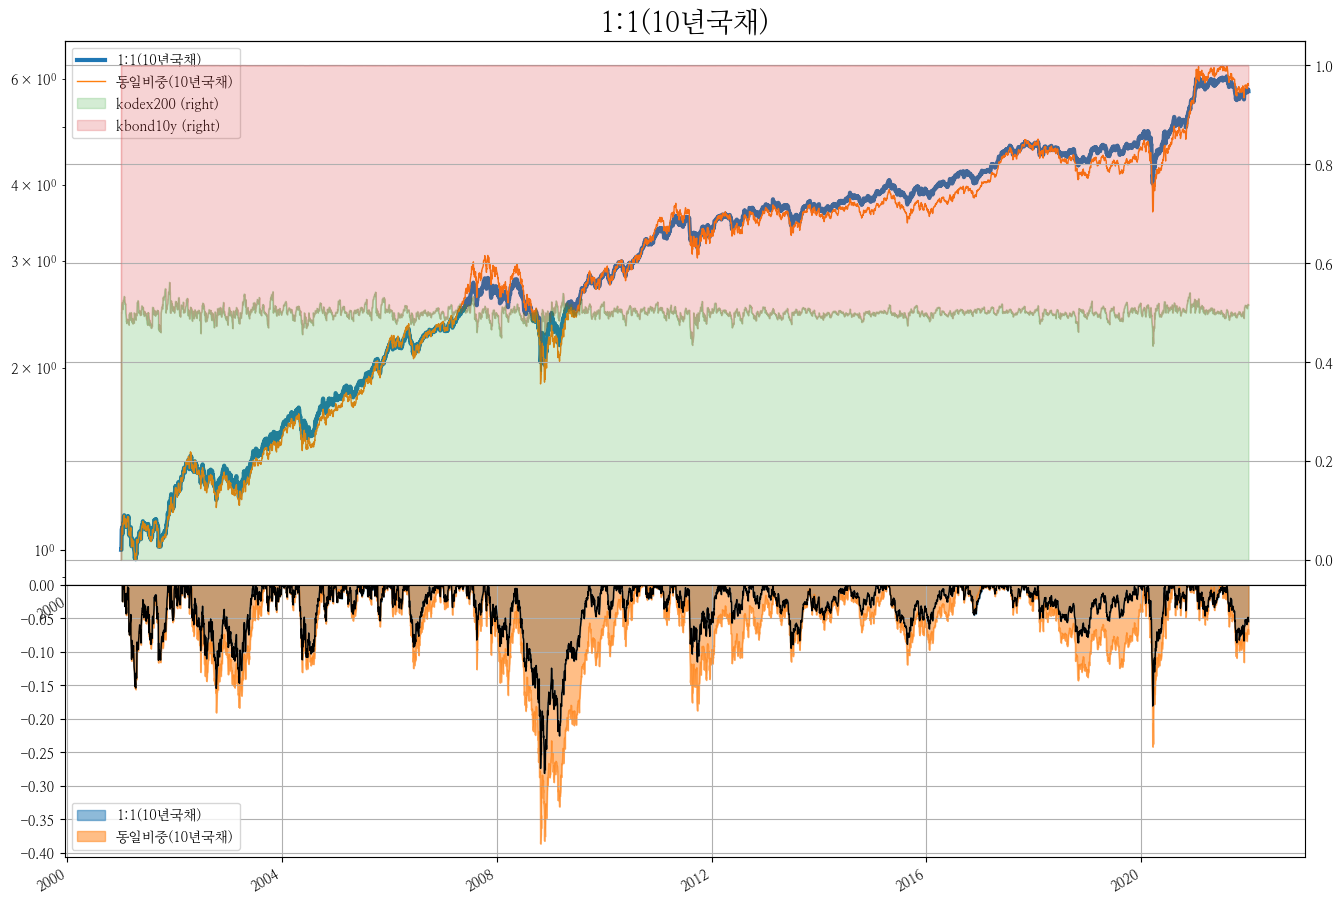

In [16]:
plot_assets(r10_ew, '2001', '2021', '1:1(10년국채)')

## 20년 만기 채권(10년 채권 레버리지)

In [17]:
bt_kbond20y = long_only_ew(data, ['kbond20y'], 'kbond20y', initial_capital=100000000)
bt_test20 = bt.Backtest(주식채권혼합전략, data[['kodex200', 'kbond20y']], name='1:1(20년국채)', initial_capital=100000000)
r20 = bt.run(bt_kodex200, bt_kbond20y, bt_test20)

2001-01-02 00:00:00
2001-01-02 00:00:00
2001-01-31 00:00:00
2001-02-28 00:00:00
2001-03-30 00:00:00
2001-04-30 00:00:00
2001-05-31 00:00:00
2001-06-29 00:00:00
2001-07-31 00:00:00
2001-08-31 00:00:00
2001-09-28 00:00:00
2001-10-31 00:00:00
2001-11-30 00:00:00
2001-12-28 00:00:00
2002-01-31 00:00:00
2002-02-28 00:00:00
2002-03-29 00:00:00
2002-04-30 00:00:00
2002-05-31 00:00:00
2002-06-28 00:00:00
2002-07-31 00:00:00
2002-08-30 00:00:00
2002-09-30 00:00:00
2002-10-31 00:00:00
2002-11-29 00:00:00
2002-12-30 00:00:00
2003-01-30 00:00:00
2003-02-28 00:00:00
2003-03-31 00:00:00
2003-04-30 00:00:00
2003-05-30 00:00:00
2003-06-30 00:00:00
2003-07-31 00:00:00
2003-08-29 00:00:00
2003-09-30 00:00:00
2003-10-31 00:00:00
2003-11-28 00:00:00
2003-12-30 00:00:00
2004-01-30 00:00:00
2004-02-27 00:00:00
2004-03-31 00:00:00
2004-04-30 00:00:00
2004-05-31 00:00:00
2004-06-30 00:00:00
2004-07-30 00:00:00
2004-08-31 00:00:00
2004-09-30 00:00:00
2004-10-29 00:00:00
2004-11-30 00:00:00
2004-12-30 00:00:00


In [18]:
r20.backtests['1:1(20년국채)'].stats.display()

Stats for price from 2001-01-01 00:00:00 - 2021-12-30 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
708.36%             0.86  10.47%  -29.18%

Annualized Returns:
mtd    3m      6m      ytd     1y      3y     5y     10y    incep.
-----  ------  ------  ------  ------  -----  -----  -----  --------
3.04%  -0.16%  -5.27%  -1.15%  -1.15%  9.09%  6.65%  6.40%  10.47%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.86     0.89       1.10
mean    10.96%   9.96%      10.19%
vol     12.76%   11.18%     9.28%
skew    -0.29    0.15       -0.17
kurt    9.43     1.28       -0.43
best    6.45%    13.76%     25.93%
worst   -8.57%   -8.79%     -8.60%

Drawdowns:
max      avg       # days
-------  ------  --------
-29.18%  -2.05%     28.93

Misc:
---------------  ------
avg. up month    2.73%
avg. down month  -2.19%
up year %        85.00%
12m up %   

In [19]:
r20.display()

Stat                 kodex200    kbond20y    1:1(20년국채)
-------------------  ----------  ----------  ---------------
Start                2001-01-01  2001-01-01  2001-01-01
End                  2021-12-30  2021-12-30  2021-12-30
Risk-free rate       0.00%       0.00%       0.00%

Total Return         781.49%     428.77%     708.36%
Daily Sharpe         0.58        0.66        0.86
Daily Sortino        0.93        0.99        1.38
CAGR                 10.92%      8.26%       10.47%
Max Drawdown         -52.67%     -24.47%     -29.18%
Calmar Ratio         0.21        0.34        0.36

MTD                  6.52%       -0.44%      3.04%
3m                   -0.81%      0.09%       -0.16%
6m                   -9.05%      -1.83%      -5.27%
YTD                  2.77%       -5.54%      -1.15%
1Y                   2.77%       -5.54%      -1.15%
3Y (ann.)            17.32%      0.12%       9.09%
5Y (ann.)            10.82%      1.52%       6.65%
10Y (ann.)           6.81%       5.16%       6.40

In [20]:
r20.prices.resample('M').last().to_drawdown_series().describe()

,kodex200,kbond20y,1:1(20년국채)
count,252.000,252.000,252.000
mean,-0.099,-0.060,-0.023
std,0.092,0.055,0.036
min,-0.455,-0.225,-0.237
25%,-0.145,-0.103,-0.032
50%,-0.084,-0.054,-0.008
75%,-0.023,0.000,0.000
max,0.000,0.000,0.000


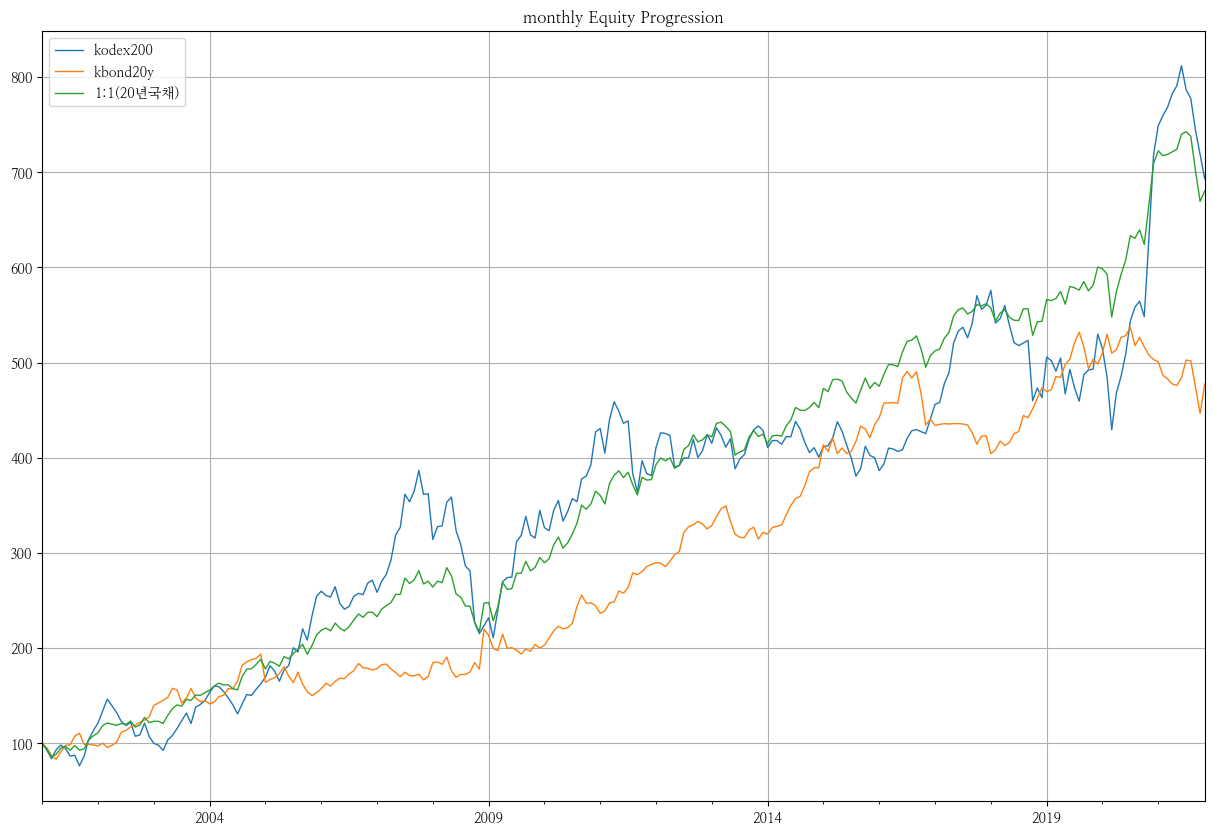

In [22]:
r20.plot(freq='M', figsize=(15,10));

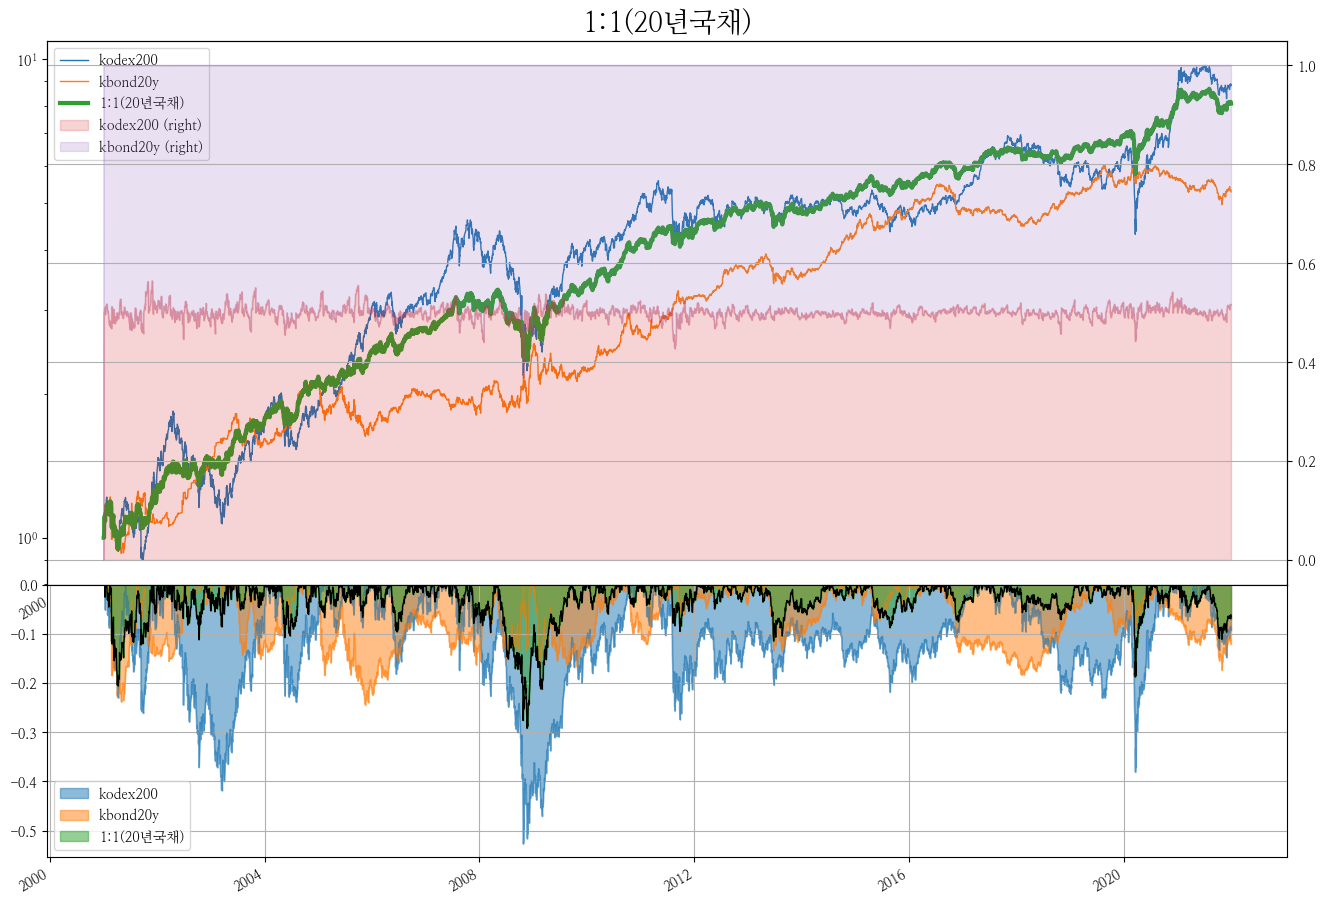

In [23]:
plot_assets(r20, '2001', '2021', '1:1(20년국채)')

In [24]:
r_all = bt.run(bt_kodex200, bt_kbond10y, bt_kbond20y, bt_test10, bt_test20, bt_ew10)

In [25]:
r_all.display()

Stat                 kodex200    kbond10y    kbond20y    1:1(10년국채)    1:1(20년국채)    동일비중(10년국채)
-------------------  ----------  ----------  ----------  ---------------  ---------------  --------------------
Start                2001-01-01  2001-01-01  2001-01-01  2001-01-01       2001-01-01       2001-01-01
End                  2021-12-30  2021-12-30  2021-12-30  2021-12-30       2021-12-30       2021-12-30
Risk-free rate       0.00%       0.00%       0.00%       0.00%            0.00%            0.00%

Total Return         781.49%     187.67%     428.77%     471.93%          708.36%          484.52%
Daily Sharpe         0.58        0.78        0.66        0.79             0.86             0.67
Daily Sortino        0.93        1.18        0.99        1.29             1.38             1.08
CAGR                 10.92%      5.16%       8.26%       8.66%            10.47%           8.77%
Max Drawdown         -52.67%     -11.98%     -24.47%     -28.16%          -29.18%          -38.66%
Ca

In [26]:
r_all.prices.resample('M').last().to_drawdown_series().describe()

,kodex200,kbond10y,kbond20y,1:1(10년국채),1:1(20년국채),동일비중(10년국채)
count,252.000,252.000,252.000,252.000,252.000,252.000
mean,-0.099,-0.024,-0.060,-0.025,-0.023,-0.047
std,0.092,0.025,0.055,0.038,0.036,0.059
min,-0.455,-0.108,-0.225,-0.231,-0.237,-0.327
25%,-0.145,-0.044,-0.103,-0.035,-0.032,-0.068
50%,-0.084,-0.017,-0.054,-0.012,-0.008,-0.029
75%,-0.023,0.000,0.000,0.000,0.000,0.000
max,0.000,0.000,0.000,0.000,0.000,0.000
